In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
from __future__ import absolute_import, division, print_function, unicode_literals

In [122]:
classes = ['bro', 'kro', 'par', 'pte', 'rex', 'ste', 'tri']
class_nums = {
    'bro' : 0, 
    'kro': 1, 
    'par' : 2, 
    'pte': 3, 
    'rex': 4, 
    'ste' : 5, 
    'tri' : 6
}
dataset = []

for c in classes:
    path = 'images/'+ c + '/' + c +'_'
    going = True
    count = 0
    while going:
        image_path = path + str(count) + '.jpeg'

        if not os.path.isfile(image_path):
            going = False 
            break
        
        image = Image.open(image_path)
        
        # Convert the image to grayscale
        gray_image = image.convert('L')

        # Convert the grayscale image to a NumPy array
        image_array = np.array(gray_image)

        # Threshold the image to get a binary image
        threshold = 128
        binary_image = (image_array > threshold).astype(np.uint8)

        dataset.append([binary_image, c])
        count += 1

np.random.shuffle(dataset)

In [123]:
# get train-valid data
train_num = int(len(dataset) * 0.75)
train_data = dataset[0:train_num]
valid_data = dataset[train_num:]
x_train = np.array([np.array(d[0]) for d in train_data])
y_train = np.array([class_nums[d[1]] for d in train_data])
x_test = np.array([d[0] for d in valid_data])
y_test = np.array([class_nums[d[1]] for d in valid_data])

Loaded the plot_curve function.


In [132]:
def create_model(lr):
  ''' 
  neural network model
  returns model
  '''
  model = tf.keras.models.Sequential()
  # Flatten 2d array into 1d array
  model.add(tf.keras.layers.Flatten(input_shape=(200, 200)))

  # LAYERS #
  # first hidden 
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  # dropout regularization
  model.add(tf.keras.layers.Dropout(rate=0.1))
  # test and dropout
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.1))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))   

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
  
  # fit mdl
  history = model.fit(
    x=train_features, y=train_label, 
    batch_size=batch_size, epochs=epochs, 
    shuffle=True , validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist

In [133]:
# hyperparams
lr = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Train the model from training set
mdl = create_model(lr)
epochs, hist = train_model(mdl, x_train, y_train, 
                           epochs, batch_size, validation_split)


Epoch 1/50


/Users/penelopeking/Desktop/Projects/datahacks_2024/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1057 - loss: 2.2590 - val_accuracy: 0.4516 - val_loss: 2.2000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3496 - loss: 2.7302 - val_accuracy: 0.3226 - val_loss: 2.0511
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4309 - loss: 1.6582 - val_accuracy: 0.2903 - val_loss: 1.8240
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5447 - loss: 1.2859 - val_accuracy: 0.4839 - val_loss: 1.6397
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6341 - loss: 0.9789 - val_accuracy: 0.3871 - val_loss: 1.8861
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6748 - loss: 0.8169 - val_accuracy: 0.3548 - val_loss: 1.8791
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7642 - loss: 0.6789 - val_accuracy: 0.3226 - val_loss: 1.7686
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8211 - loss: 0.5279 - val_accuracy: 0.3871 - val_loss: 1.6859
Epoch 9/50
1/

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5745 - loss: 1.6944 
Test accuracy: 0.5961538553237915


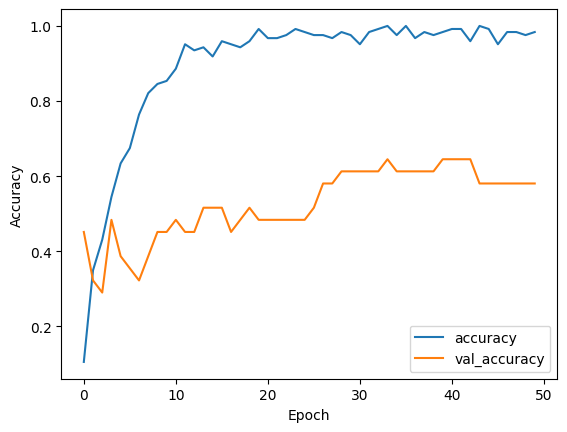

In [134]:
def plot_curve(history):
    plt.figure()
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

plot_curve(hist)

# Evaluate the model
loss, accuracy = mdl.evaluate(x=x_test, y=y_test)
print(f"Test accuracy: {accuracy}")

In [137]:
# Test performance
print("TEST performance = ")
mdl.evaluate(x=x_test, y=y_test, batch_size=batch_size)

TEST performance = 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5962 - loss: 1.6573


[1.6572951078414917, 0.5961538553237915]

In [ ]:
# to do: rotate images